# Analiza toru lotu skoczka narciarskiego :)

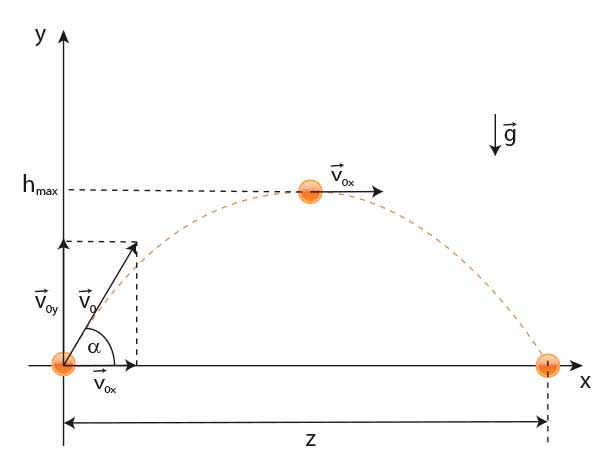

In [1]:
#import Pkg
#Pkg.add("Images")
#using Images
#img = load("C:\Users\szczy\Documents\GitHub\rownania_rozniczkowe")
using Printf
using Plots

In [2]:
# dane
g = 9.81
m = 2
vx₀ = 26.5
α = π / 4
vy₀=26.5
v₀=26.5
# obliczenia
czas = (2 * v₀ * sin(α)) / g
#zasieg = (v₀ ^ 2 * sin(2 * α)) / g
h=80
hₘ = h+((v₀ * sin(α)) ^ 2) / (2 * g)
czas = (2 * v₀ * sin(α)) / g

k=0.5
czas

3.8202507036582074

In [3]:
delta1=4*v₀^4*sin(α)*sin(α)*cos(α)*cos(α)+8*g*h*v₀^2*cos(α)*cos(α)
zasieg=(-2*v₀^2*sin(α)*cos(α)-sqrt(delta1))/(-2*g)
#z2=(-2*v₀^2*sin(α)*cos(α)+sqrt(delta))/(-2*g)#wychodzi ujemne więc bierzemy z1

119.5058588131964

In [4]:
delta2=v₀^2*sin(α)*sin(α)+2*g*h
t1=(-v₀*sin(α)-sqrt(delta2))/(-g)

#t2=(-v₀*sin(α)+sqrt(delta2))/(-g) ujemne wiec do wyjebania

6.3776153327044005

# 1. Bez uwzględnienia oporów powietrza

Układ równań opisujących tor obiektu w rzucie ukośnym z oporem powietrza:

$$x(t)=(v_o\cos{\alpha})t $$

$$y(t)=(v_o\sin{\alpha})t-\frac{1}{2}gt^2$$

Wzory opisujące prędkości:

$$v_x=v_o\cos{\alpha}$$

$$v_y(t)=v_o\sin{\alpha} - gt$$

In [19]:
function x(v₀, α)
    t -> v₀ * t * cos(α)
end
b
function y(v₀, α, g,h)
    t -> h+v₀ * t * sin(α) - (g * t ^ 2) / 2
end

function v_x(v₀, α)
    t -> v₀ * cos(α)
end

function v_y(v₀, α, g)
    t -> v₀ * sin(α) - g * t
end

v_y (generic function with 1 method)

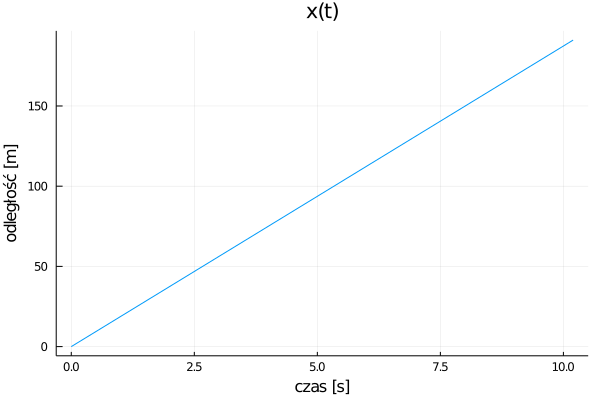

In [20]:
plot(x(vx₀, α), 0, czas+t1,
    xlabel = "czas [s]", 
    ylabel = "odległość [m]",
    legend = :none,
    title = "x(t)")

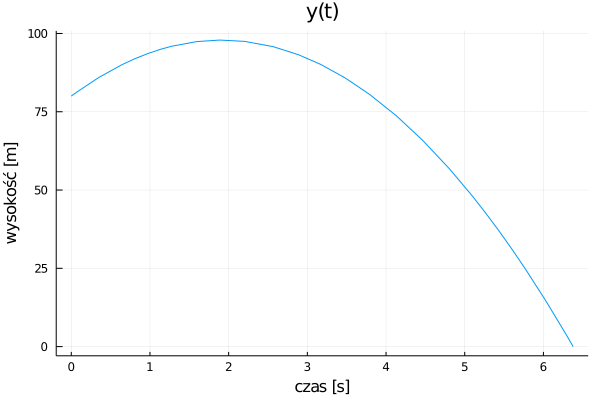

In [21]:
plot(y(vy₀, α, g,h), 0, t1,
    xlabel = "czas [s]", 
    ylabel = "wysokość [m]", 
    legend =:none,
    title = "y(t)")

In [25]:
a = @animate for i in LinRange(0, czas+t1, 500)
    plot([0, zasieg], [0, hₘ], flip = false)
    
    plot!(x(vx₀, α), y(vy₀, α, g,h), 0, i,
        xlabel = "odległość [m]", 
        ylabel = "wysokość [m]",
        xlims = (0, zasieg),
        ylims = (0, hₘ),
        legend = :none,
        linewidth = 5.5,
        #aspect_ratio = 2.5,
        title = "tor ruchu")  
end

gif(a, "rzut12.gif", fps = 30)

C:\Users\Huawei\Desktop\rozniczki_project\rownania_rozniczkowe\rzut12.gif: Permission denied


LoadError: [91mfailed process: Process(`[4m'C:\Users\Huawei\.julia\artifacts\7350a6401f1c0d38cc3518193083bc4f83adfe99\bin\ffmpeg.exe'[24m [4m-v[24m [4m16[24m [4m-framerate[24m [4m30[24m [4m-i[24m [4m'C:\Users\Huawei\AppData\Local\Temp\jl_doQVTM/%06d.png'[24m [4m-i[24m [4m'C:\Users\Huawei\AppData\Local\Temp\jl_doQVTM/palette.bmp'[24m [4m-lavfi[24m [4mpaletteuse=dither=sierra2_4a[24m [4m-loop[24m [4m0[24m [4m-y[24m [4m'C:\Users\Huawei\Desktop\rozniczki_project\rownania_rozniczkowe\rzut12.gif'[24m`, ProcessExited(1)) [1][39m


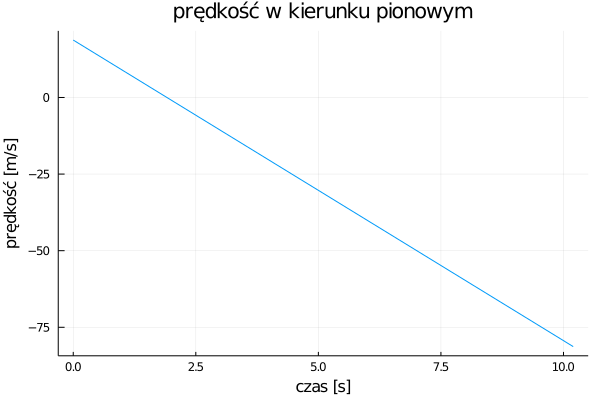

In [26]:
plot(v_y(vy₀, α, g), 0, czas+t1,
    xlabel = "czas [s]", 
    ylabel = "prędkość [m/s]",
    legend = :none,
    title = "prędkość w kierunku pionowym")

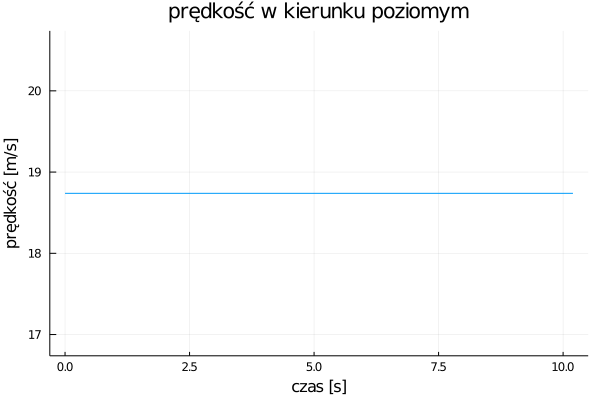

In [27]:
plot(v_x(v₀, α), 0, czas+t1,
    xlabel = "czas [s]", 
    ylabel = "prędkość [m/s]",
    ylim = (v₀ * cos(α) - 2, v₀ * cos(α) + 2),
    legend =:none,
    title = "prędkość w kierunku poziomym")

# 2. Z uwzględnieniem oporów powietrza

In [28]:
# dane
k = 0.5 #współczynnik oporu

0.5

# a) rozwiązanie analityczne

Siła oporu:

$$D=-kv$$

Układ równań opisujących tor obiektu w rzucie ukośnym z oporem powietrza:

$$x(t)=(\frac{m}{k}v_o\cos{\alpha})(1-e^{\frac{-k}{m}{t}}) $$

$$y(t)=(\frac{m}{k}v_o\sin{\alpha}+\frac{m^{2}}{k^{2}}g)(1-e^{\frac{-k}{m}{t}})-\frac{m}{k}gt$$

In [29]:
function x_opor(m, k, v₀, α)
    t -> m / k * v₀ * cos(α) * (1 - exp((-k / m) * t))
end

function y_opor(m, k, v₀, α, g,h)
    t ->h + (m / k * v₀ * sin(α) + (m / k)^2 * g) * (1 - exp((-k / m) * t)) - (m / k) * g * t
end

y_opor (generic function with 1 method)

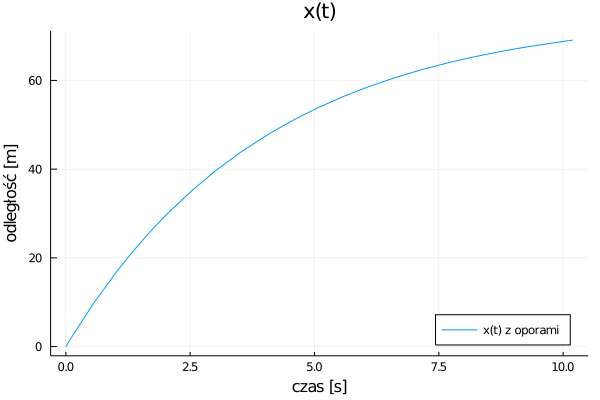

In [30]:
plot(x_opor(m, k, v₀, α), 0, czas+t1,
    xlabel = "czas [s]", 
    ylabel = "odległość [m]", 
    label = "x(t) z oporami",
    legend = :bottomright,
    title = "x(t)")

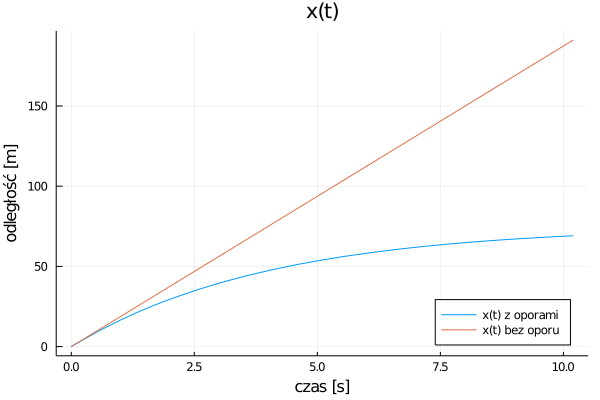

In [31]:
plot!(x(v₀, α), 0, czas+t1,
    label = "x(t) bez oporu")

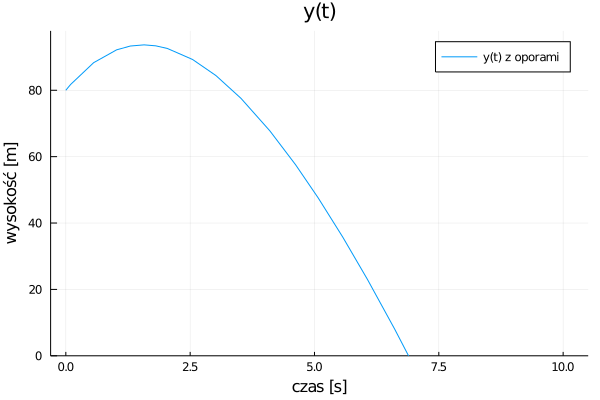

In [32]:
plot(y_opor(m, k, v₀, α, g,h), 0, czas+t1,
    xlabel = "czas [s]", 
    ylabel = "wysokość [m]", 
    label = "y(t) z oporami",
    legend = :topright,
    ylim = (0, hₘ),
    title = "y(t)")

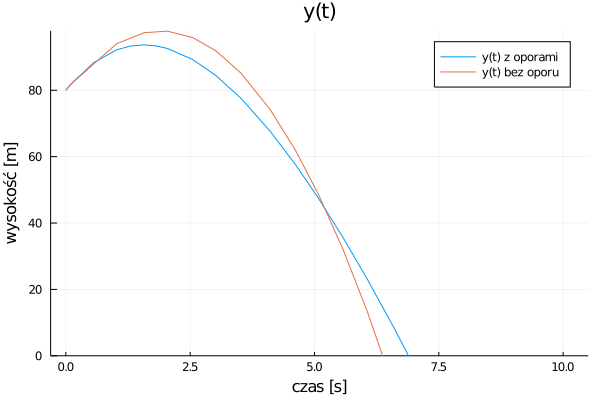

In [33]:
plot!(y(v₀, α, g,h), 0, czas+t1,
    label = "y(t) bez oporu")

In [34]:
a = @animate for i in LinRange(0, t1+czas, 500)
    plot([0, zasieg], [0, hₘ], flip = false)
    
    plot!(x_opor(m, k, v₀, α), y_opor(m, k, v₀, α, g,h), 0, i,
        xlabel = "odległość [m]", 
        ylabel = "wysokość [m]",
        label = "tor ruchu z oporami",
        xlims = (0, zasieg),
        ylims = (0, hₘ),
        legend = :bottom,
        linewidth = 5.5,
        #aspect_ratio = 2.5,
        title = "tor ruchu")
end

gif(a, "rzut2.gif", fps = 30)

C:\Users\Huawei\Desktop\rozniczki_project\rownania_rozniczkowe\rzut2.gif: Permission denied


LoadError: [91mfailed process: Process(`[4m'C:\Users\Huawei\.julia\artifacts\7350a6401f1c0d38cc3518193083bc4f83adfe99\bin\ffmpeg.exe'[24m [4m-v[24m [4m16[24m [4m-framerate[24m [4m30[24m [4m-i[24m [4m'C:\Users\Huawei\AppData\Local\Temp\jl_jKbi6h/%06d.png'[24m [4m-i[24m [4m'C:\Users\Huawei\AppData\Local\Temp\jl_jKbi6h/palette.bmp'[24m [4m-lavfi[24m [4mpaletteuse=dither=sierra2_4a[24m [4m-loop[24m [4m0[24m [4m-y[24m [4m'C:\Users\Huawei\Desktop\rozniczki_project\rownania_rozniczkowe\rzut2.gif'[24m`, ProcessExited(1)) [1][39m


In [35]:
a = @animate for i in LinRange(0, czas+t1, 500)
    plot([0, zasieg], [0, hₘ], flip = false)
    
    plot!(x_opor(m, k, v₀, α), y_opor(m, k, v₀, α, g,h), 0, i,
        xlabel = "odległość [m]", 
        ylabel = "wysokość [m]",
        label = "tor ruchu z oporami",
        xlims = (0, zasieg),
        ylims = (0, hₘ),
        legend = :bottom,
        linewidth = 5.5,
        #aspect_ratio = 2.5,
        title = "tor ruchu")
    
    plot!(x(v₀, α), y(v₀, α, g,h), 0, i,
        label = "tor ruchu bez oporu",
        lims = (0, zasieg),
        linewidth = 5.5,
        #aspect_ratio = 2.5,
        linecolor = "navy",
        ylims = (0, hₘ)) 
end

gif(a, "rzut3.gif", fps = 30)

C:\Users\Huawei\Desktop\rozniczki_project\rownania_rozniczkowe\rzut3.gif: Permission denied


LoadError: [91mfailed process: Process(`[4m'C:\Users\Huawei\.julia\artifacts\7350a6401f1c0d38cc3518193083bc4f83adfe99\bin\ffmpeg.exe'[24m [4m-v[24m [4m16[24m [4m-framerate[24m [4m30[24m [4m-i[24m [4m'C:\Users\Huawei\AppData\Local\Temp\jl_WUPMCO/%06d.png'[24m [4m-i[24m [4m'C:\Users\Huawei\AppData\Local\Temp\jl_WUPMCO/palette.bmp'[24m [4m-lavfi[24m [4mpaletteuse=dither=sierra2_4a[24m [4m-loop[24m [4m0[24m [4m-y[24m [4m'C:\Users\Huawei\Desktop\rozniczki_project\rownania_rozniczkowe\rzut3.gif'[24m`, ProcessExited(1)) [1][39m


# b) rozwiązanie numeryczne

Koszt obliczeń rozwiązania analitycznygeo może być zbyt duży, z uwagi na występowanie funkcji exp(). Rozwiązanie numeryczne jest bardziej wydajne. Metody numeryczne pozwalają otrzymać zadowalający wynik, minimalnie różniący się od otrzymanego metodami analitycznymi.

Wzory opisujące ruch obiketu w rzucie ukosnym z uwzględnieniem oporów powietrza:

$$ v_x(t_{j+1})=v_x(t_j)-\frac{k}{m}v_x(t_j)\Delta{t} $$

$$ v_y(t_{j+1})=v_y(t_j)-g\Delta{t}-\frac{k}{m}v_y(t_j)\Delta{t} $$

$$x(t_{j+1})=x(t_j)+v_x(t_j)\Delta{t}-\frac{1}{2}\frac{k}{m}v_x(t_j)\Delta{t^2}  $$

$$y(t_{j+1})=y(t_j)+v_y(t_j)\Delta{t}-\frac{1}{2}g\Delta{t^2}-\frac{1}{2}\frac{k}{m}v_y(t_j)\Delta{t^2}$$

In [20]:
using Plots

In [5]:
dt = 0.001 #milisekundy, 1/1000 sekundy


0.001

In [6]:
function vx_num(v₀, α, k, m, dt)
    vx = zeros(floor(Int, czas / dt), 1)
    vx[1] = v₀ * cos(α)
    for i in (2 : floor(Int, czas / dt))
        vx[i] = vx[i-1] - (k / m) * vx[i-1] * dt
    end
    return vx
end

function vy_num(v₀, α, k, m, g, dt)
    vy = zeros(floor(Int, czas / dt), 1)
    vy[1] = v₀ * sin(α)
    for i in (2 : floor(Int, czas / dt))
        vy[i] = vy[i-1] - (g * dt) - (k / m) * vy[i-1] * dt
    end
    return vy
end


function x_num(v₀, α, k, m, dt)
    vx = zeros(floor(Int, (czas+t1) / dt), 1)
    vx[1] = v₀ * cos(α)
    x = zeros(floor(Int, (czas+t1) / dt), 1)
    x[1] = 0
    for i in (2 : floor(Int, (czas+t1) / dt))
        vx[i] = vx[i-1] - (k / m) * vx[i-1] * dt
        x[i] = x[i-1] + vx[i-1] * dt - (1 / 2) * (k / m) * vx[i-1] * dt ^ 2
    end
    return x
end

function y_num(v₀, α, k, m, g,h, dt)
    vy = zeros(floor(Int, (czas+t1) / dt), 1)
    vy[1] = v₀ * cos(α)
    y = zeros(floor(Int, (czas+t1) / dt), 1)
    y[1] = 80
    for i in (2 : floor(Int, (czas+t1) / dt))
        vy[i] = vy[i-1] - (g * dt) - (k / m) * vy[i-1] * dt
        y[i] = y[i-1] + vy[i-1] * dt - ((1 / 2) * g * dt ^ 2) - (1 / 2) * (k / m) * vy[i-1] * dt ^ 2
    end
    return y
end


y_num (generic function with 1 method)

In [7]:
function v_yy(v₀, α, g)
    t -> v₀ * sin(α) - g * t / 1000
end

v_yy (generic function with 1 method)

In [8]:
h=80
czas_opor = 0
czas_opor_end=0
for i in (1 : floor(Int, (czas+t1) / dt))
    if abs(y_num(v₀, α, k, m, g, h,dt)[i]) < 0.007
        czas_opor = i
       
    end
end
czas_opor

6895

In [9]:
t1+czas

10.197866036362608

In [15]:

czas_opor_end=0
for j in (czas_opor : floor(Int, (czas+t1) / dt))
   
    if abs(y_num(v₀, α, k, m, g, h,dt)[j]) < 10.007
        czas_opor_end = czas_opor+j
    end
end
czas_opor_end

14131

In [10]:
zasieg_opor = x_num(v₀, α, k, m, dt)[czas_opor]

61.57379412696939

In [11]:
hₘ_opor = maximum(y_num(v₀, α, k, m, g,h, dt))

93.67871275992457

In [18]:
czas_wznoszenia = 0
for i in (1 : floor(Int, czas+t1 / dt))
    if abs(y_num(v₀, α, k, m, g,h, dt)[i]) == hₘ_opor
        czas_wznoszenia = i
    end
end
println("czas wznoszenia - ", czas_wznoszenia, " [ms]")
println("czas spadania - ", czas_opor - czas_wznoszenia, " [ms]")

czas wznoszenia - 1562 [ms]
czas spadania - 5333 [ms]


In [ ]:
plot(vx_num(v₀, α, k, m, dt),
    xlabel = "czas [ms]", 
    ylabel = "prędkość [m/s]",
    label = "prędkość w kierunku poziomym z oporami",
    xlim = (0, czas_opor),
    legend = :bottomleft,
    title = "prędkość w kierunku poziomym")

In [ ]:
plot!(v_x(v₀, α), 0, czas * 1000,
    xlabel = "czas [ms]", 
    ylabel = "prędkość [m/s]",
    label = "prędkość w kierunku poziomym bez oporów")

In [ ]:
plot(vy_num(v₀, α, k, m, g, dt),
    xlabel = "czas [ms]", 
    ylabel = "prędkość [m/s]",
    label = "prędkość w kierunku pionowym z oporami",
    xlim = (0, czas_opor),
    legend = :bottomleft,
    title = "prędkość w kierunku pionowym")

In [ ]:
plot!(v_yy(v₀, α, g), 0, czas * 1000,
    xlabel = "czas [ms]", 
    ylabel = "prędkość [m/s]",
    label = "prędkość w kierunku poziomym bez oporów")

In [ ]:
plot(x_num(v₀, α, k, m, dt),
    xlabel = "czas [ms]",
    ylabel = "odległość [m]", 
    label = "x(t) z oporami numerycznie",
    legend = :bottomright,
    xlim = (0, czas_opor),
    ylim = (0, zasieg_opor),
    title = "x(t)")

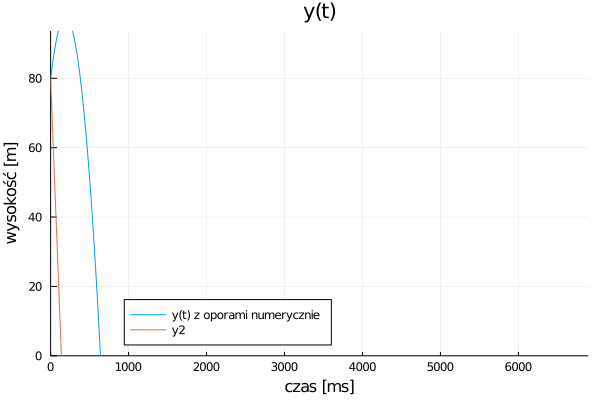

In [123]:
plot(y_num(v₀, α, k, m, g,h, dt),
    xlabel = "czas [ms]", 
    ylabel = "wysokość [m]",
    label = "y(t) z oporami numerycznie",
    legend = :bottom,
    xlim = (0, czas_opor),
    ylim = (0, hₘ_opor),
    title = "y(t)")
#dlatego nie działa warunek w złożeniu
#track_x,track_y,axis_x,axis_y,length_slope=draw_trackk(h)
track_x,track_y,axis_x,axis_y,length_slope=draw_trackk(h)
plot!(track_x,track_y)

In [106]:
xx,yy = x_num(v₀, α, k, m, dt),y_num(v₀, α, k, m, g,h, dt)
#yy=[y(i) for i in (1 : floor(Int, (czas+t1) / dt))]
#yy[2:length(xx)].=0


function plot_with_oporr() #uzupełnic o potrzebne dane
    track_x,track_y,axis_x,axis_y,length_slope=draw_trackk(h)
    x,y = x_num(v₀, α, k, m, dt),y_num(v₀, α, k, m, g,h, dt)
    
    for i in 1:length(x)
        println(y[i],"--->",track_y[i], " argument ", x[i])
        #if y[i] <= track_y[i]
         #   y[i:length(x)] .= 0
            #@printf("%.2fm ",x[i])
        #end
    end
end

plot_with_oporr()

80.0--->79.42264973081038 argument 0.0
80.18688498937706--->78.84529946162075 argument 0.18737548937705953
80.372773405005--->78.26794919243112 argument 0.3747353641300043
80.55766532993165--->77.6905989232415 argument 0.562079625560053
80.74156084719789--->77.11324865405187 argument 0.7494082749683159
80.92446003983768--->76.53589838486225 argument 0.9367213136557947
81.10636299087808--->75.95854811567261 argument 1.1240187429233828
81.28726978333924--->75.38119784648299 argument 1.3113005640718653
81.46718050023435--->74.80384757729337 argument 1.4985667784019188
81.64609522456972--->74.22649730810375 argument 1.6858173872141113
81.82401403934473--->73.64914703891412 argument 1.873052391808903
82.00093702755184--->73.07179676972449 argument 2.0602717934866455
82.1768642721766--->72.49444650053486 argument 2.247475593547581
82.35179585619764--->71.91709623134524 argument 2.4346637932918447
82.5257318625867--->71.33974596215562 argument 2.621836394019463
82.69867237430854--->70.7623956

97.22071377798638--->-11.798692801150494 argument 29.412495664403945
97.25116570788194--->-12.376043070340117 argument 29.59742011247564
97.28063410011667--->-12.95339333952974 argument 29.782329150176658
97.30911903665206--->-13.530743608719362 argument 29.9672227787912
97.33662059944274--->-14.108093877908999 argument 30.15210099960336
97.36313887043652--->-14.685444147098622 argument 30.336963813897118
97.38867393157437--->-15.262794416288244 argument 30.521811222956355
97.41322586479048--->-15.840144685477867 argument 30.706643228064834
97.43679475201213--->-16.417494954667504 argument 30.89145983050622
97.45938067515985--->-16.994845223857126 argument 31.076261031564073
97.48098371614732--->-17.57219549304675 argument 31.261046832521835
97.50160395688137--->-18.14954576223637 argument 31.44581723466285
97.52124147926202--->-18.726896031425994 argument 31.630572239270357
97.53989636518247--->-19.30424630061563 argument 31.815311847627477
97.5575686965291--->-19.881596569805254 argu

90.4911036792667--->-100.13328398716322 argument 57.52749369623984
90.37202341000382--->-100.71063425635285 argument 57.71007522780888
90.25197206409672--->-101.28798452554247 argument 57.89264154425029
90.13094972246844--->-101.86533479473209 argument 58.075192646831994
90.0089564660353--->-102.44268506392174 argument 58.257728536821816
89.88599237570685--->-103.02003533311137 argument 58.44024921548747
89.76205753238594--->-103.59738560230099 argument 58.62275468409658
89.63715201696863--->-104.17473587149061 argument 58.805244943916634
89.51127591034427--->-104.75208614068023 argument 58.987719996215034
89.38442929339547--->-105.32943640986986 argument 59.170179842259074
89.25661224699809--->-105.90678667905948 argument 59.35262448331594
89.12782485202123--->-106.4841369482491 argument 59.53505392065272
88.99806718932729--->-107.06148721743872 argument 59.717468155536395
88.8673393397719--->-107.63883748662838 argument 59.899867189233824
88.73564138420399--->-108.216187755818 argume

65.66423977934559--->-178.0755703277627 argument 82.03888666600658
65.4147934154077--->-178.6529205969523 argument 82.2194255814948
65.16438683866681--->-179.23027086614195 argument 82.39994945207341
64.91302012914066--->-179.8076211353316 argument 82.58045827899613
64.66069336684029--->-180.3849714045212 argument 82.76095206351661
64.40740663177013--->-180.96232167371085 argument 82.94143080688838
64.15316000392788--->-181.53967194290044 argument 83.12189451036487
63.89795356330462--->-182.1170222120901 argument 83.3023431751994
63.64178738988474--->-182.6943724812797 argument 83.48277680264519
63.38466156364598--->-183.27172275046934 argument 83.66319539395536
63.1265761645594--->-183.84907301965893 argument 83.84359895038293
62.86753127258942--->-184.42642328884858 argument 84.02398747318078
62.607526967693765--->-185.00377355803823 argument 84.20436096360174
62.34656332982352--->-185.58112382722783 argument 84.3847194228985
62.084640438923095--->-186.15847409641748 argument 84.5650

17.560886121242987--->-264.67811070620655 argument 108.95228620079159
17.16829837010994--->-265.2554609753962 argument 109.13058233298526
16.774762334622825--->-265.8328112445858 argument 109.30886360716791
16.38027809380533--->-266.41016151377545 argument 109.4871300245777
15.984845726674573--->-266.98751178296504 argument 109.66538158645271
15.588465312241077--->-267.5648620521547 argument 109.8436182940309
15.191136929508783--->-268.1422123213443 argument 110.02184014855013
14.792860657475051--->-268.71956259053394 argument 110.20004715124814
14.393636575130655--->-269.2969128597236 argument 110.37823930336259
13.993464761459787--->-269.8742631289132 argument 110.55641660613104
13.592345295440058--->-270.45161339810284 argument 110.73457906079092
13.190278256042498--->-271.02896366729243 argument 110.91272666857958
12.787263722231556--->-271.6063139364821 argument 111.09085943073426
12.383301772965098--->-272.1836642056717 argument 111.26897734849209
11.978392487194409--->-272.76101

-50.81582949473034--->-350.12595054627116 argument 135.17914182723044
-51.347907186228724--->-350.7033008154608 argument 135.3552523881219
-51.88092153791948--->-351.2806510846504 argument 135.53134827313326
-52.41487247174759--->-351.85800135384005 argument 135.70742948348757
-52.94975990966456--->-352.43535162302965 argument 135.88349602040768
-53.48558377362836--->-353.0127018922193 argument 136.05954788511636
-54.022343985603506--->-353.59005216140895 argument 136.23558507883632
-54.56004046756098--->-354.16740243059854 argument 136.41160760279013
-55.09867314147829--->-354.7447526997882 argument 136.58761545820028
-55.638241929339436--->-355.3221029689778 argument 136.76360864628916
-56.17874675313493--->-355.89945323816744 argument 136.93958716827905
-56.72018753486178--->-356.47680350735703 argument 137.11555102539208
-57.26256419652348--->-357.0541537765467 argument 137.29150021885036
-57.80587666013004--->-357.6315040457363 argument 137.46743474987585
-58.35012484769797--->-35

-196.96060878840484--->-482.33916219069545 argument 175.12773625230648
-197.70515674829542--->-482.9165124598851 argument 175.3005177636625
-198.4506236625227--->-483.49386272907475 argument 175.47328487655923
-199.19700945450714--->-484.0712129982643 argument 175.6460375921966
-199.94431404767556--->-484.64856326745394 argument 175.81877591177428
-200.69253736546122--->-485.2259135366436 argument 175.991499836492
-201.44167933130373--->-485.80326380583324 argument 176.16420936754938
-202.1917398686491--->-486.3806140750229 argument 176.3369045061458
-202.9427189009497--->-486.9579643442124 argument 176.50958525348068
-203.69461635166425--->-487.5353146134021 argument 176.6822516107533
-204.4474321442579--->-488.11266488259173 argument 176.8549035791628
-205.2011662022022--->-488.6900151517814 argument 177.02754115990825
-205.95581844897498--->-489.2673654209709 argument 177.20016435418864
-206.71138880806052--->-489.84471569016057 argument 177.37277316320285
-207.46787720294947--->-49

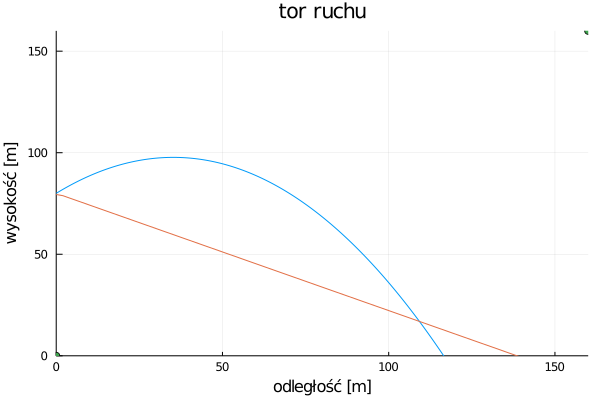

In [51]:
m=60
dt =0.001#0.1


function draw_trackk(h,angle=30) #h=80 #h=height_ramp
    angle_slope = angle/180 * π
    distance_max = h * 2
    length_slope = h / tan(angle_slope)
    y(x)=-tan(angle_slope)*x+h
    
    axis_x = [0,distance_max] 
    axis_y = [0,distance_max]
    
    #for equation
    
    track_x = [i for i in (1 : floor(Int, (czas+t1) / dt))] #*100
    track_x[1] = 0 #idk czy tak może być, ale brakuje w tej tablicy 1
    track_y = [y(i) for i in (1 : floor(Int, (czas+t1) / dt))] #*100
    
    #track_x = []
    #track_y = []
    
    #push!(track_x,0.0)
    #push!(track_y,h)
    #push!(track_x,length_slope)
    #push!(track_y,0)
    
    return track_x,track_y,axis_x,axis_y,length_slope
end

function plot_with_opor() #uzupełnic o potrzebne dane
    track_x,track_y,axis_x,axis_y,length_slope=draw_trackk(h)
    x,y = x_num(v₀, α, k, m, dt),y_num(v₀, α, k, m, g,h, dt)
    
    #powinno sprawdzać czy styka się ze skocznią
    for i in 1:length(x)
        if x[i] >= 109 #track_y[i]  #na ten moment nie mam pomysłu jak to usprawnić, by działało przy każdych param, dlatego jest aby prosteza
        #if (x[i],y[i]) <=(track_x[i],track_y[i])
        #if y[i] == abs(track_y[i])
            for j in i:length(x)
                y[j] = track_y[j]
                x[j] = track_x[j]
            end
        end
    end
            
    plot(x, y, #seriestype=:scatter, #popracować aby ten scatter lepiej wyglądał
        xlabel = "odległość [m]", 
        ylabel = "wysokość [m]",
        label = "tor ruchu z oporami numerycznie",
        xlim = (0, zasieg_opor),
        ylim = (0, hₘ_opor),
        legend = :bottom,
        title = "tor ruchu")
    
    plot!(track_x,track_y)
    plot!(axis_x,axis_y, 
        seriestype=:scatter,
        xlim = (axis_x[1],axis_x[2]),
        ylim = (axis_y[1],axis_y[2]),
        leg=false)
end
    
    
plot_with_opor()
#plot!(x_opor(m, k, v₀, α), y_opor(m, k, v₀, α, g,h), 0, czas_opor / 1000,
 #   label = "tor ruchu z oporami analitycznie",
  #  xlim = (0, zasieg_opor),
   # ylim = (0, hₘ_opor))

In [100]:
dt = 0.01

plot(x_num(v₀, α, k, m, dt), y_num(v₀, α, k, m, g,h, dt),
    xlabel = "odległość [m]", 
    ylabel = "wysokość [m]",
    label = "tor ruchu z oporami numerycznie",
    xlim = (0, zasieg_opor),
    ylim = (0, hₘ_opor),
    legend = :bottom,
    title = "tor ruchu")

plot!(x_opor(m, k, v₀, α), y_opor(m, k, v₀, α, g, h), 0, czas+t1,
    label = "tor ruchu z oporami analitycznie",
    xlim = (0, zasieg_opor),
    ylim = (0, hₘ_opor))

LoadError: [91mUndefVarError: x_opor not defined[39m

In [ ]:
dt = 0.1

plot(x_num(v₀, α, k, m, dt), y_num(v₀, α, k, m, g,h, dt),
    xlabel = "odległość [m]",
    ylabel = "wysokość [m]",
    label = "tor ruchu z oporami numerycznie",
    xlim = (0, zasieg_opor),
    ylim = (0, hₘ_opor),
    legend = :bottom,
    title = "tor ruchu")

plot!(x_opor(m, k, v₀, α), y_opor(m, k, v₀, α, g,h), 0, czas+t1,
    label = "tor ruchu z oporami analitycznie",
    xlim = (0, zasieg_opor),
    ylim = (0, hₘ_opor))

In [ ]:
dt = 0.5

plot(x_num(v₀, α, k, m, dt), y_num(v₀, α, k, m, g, h, dt),
    xlabel = "odległość [m]", 
    ylabel = "wysokość [m]",
    label = "tor ruchu z oporami numerycznie",
    xlim = (0, zasieg_opor),
    ylim = (0, hₘ_opor),
    legend = :bottom,
    title = "tor ruchu")

plot!(x_opor(m, k, v₀, α), y_opor(m, k, v₀, α, g, h), 0, czas+t1,
    label = "tor ruchu z oporami analitycznie",
    xlim = (0, zasieg_opor),
    ylim = (0, hₘ_opor))